# Decision Tree Algorithm on IRIS dataset

### What is a Decision Tree?
A Decision Tree is a supervised machine learning algorithm used for classification and regression tasks. It works by splitting the data into subsets based on the feature values, creating a tree-like structure where each node represents a decision point. The tree predicts the target variable by following decisions from the root to a leaf node.

It is intuitive and interpretable, making it a popular choice for understanding decision-making processes.

### Steps in the Decision Tree Algorithm

#### 1. Start with the Entire Dataset:
Consider all features and their values.

#### 2. Select the Best Feature to Split:
Use a metric like Gini Index or Information Gain to identify the feature that splits the data most effectively.

#### 3. Divide the Dataset:
Split the dataset into subsets based on the selected feature's values or threshold.

#### 4. Repeat the Process Recursively:
For each subset, repeat the process of selecting the best feature and splitting until:
    All instances in a subset belong to the same class (pure node).
    A stopping criterion is met (e.g., max depth, minimum number of samples).

#### 5. Assign Labels to Leaf Nodes:
If the stopping criteria are met, assign the majority class (for classification) or average value (for regression) to the leaf nodes.

#### 6. Prediction:
For a given input, traverse the tree from the root to a leaf node by making decisions at each node based on the feature conditions.

### Example Walkthrough
Suppose we use a decision tree to classify if a flower is of species setosa, versicolor, or virginica based on petal length and width:

1. The algorithm identifies petal length as the most significant feature for the first split.
2. It divides the dataset into subsets where:
    1) Petal length ≤ 2.5 → Likely setosa.
    2) Petal length > 2.5 → Further split on petal width.
3. The tree continues splitting the data until leaf nodes contain only one species or stopping criteria are reached.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
X = df.iloc[:, :-1]  # All columns except the last one (label)
y = df.iloc[:, -1]   # Only the last column (label)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
y_pred = dt_classifier.predict(X_test)

# Step 6: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy of Decision Tree: 100.00%

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



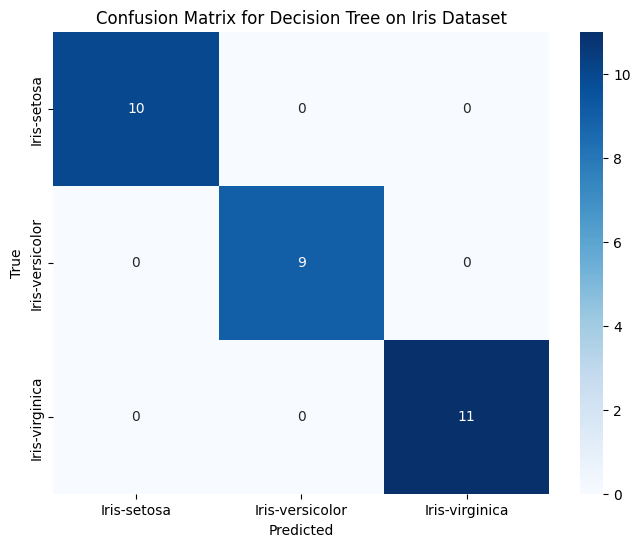

In [7]:
#print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
cm = confusion_matrix(y_test, y_pred)

# Use unique labels from the target column
class_labels = y.unique()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree on Iris Dataset')
plt.show()